In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from IPython.display import display

## Dataset

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.columns = df.columns.str.lower()

## Data cleaning and exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Null values

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.bmi.fillna(df.bmi.mean(), inplace=True)

### Duplicates

In [7]:
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


### Summary statistics for features

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Categorical features

In [9]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
numerical = ['age','avg_glucose_level', 'bmi']
for val in categorical:
    print(val)
    print(df[val].unique(), '\n')

gender
['Male' 'Female' 'Other'] 

hypertension
[0 1] 

heart_disease
[1 0] 

ever_married
['Yes' 'No'] 

work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 

residence_type
['Urban' 'Rural'] 

smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 



In [10]:
df[df.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


There is only one example with gender 'Other' so i deside to delete it

In [11]:
df.drop(3116, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.drop('id', axis=1, inplace=True)

## Train, test and validation data split

In [14]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=4)

## EDA

### Categorical features

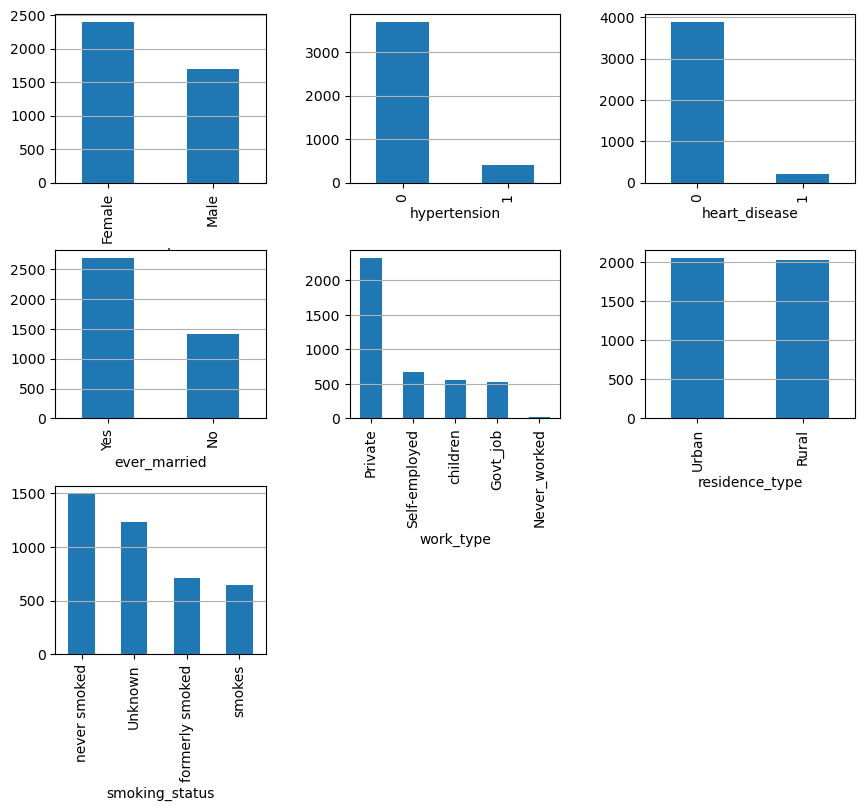

In [15]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(categorical)):
    plt.subplot(3, 3, i+1)
    df_train_full[categorical[i]].value_counts().plot.bar()
    plt.grid(axis='y')

### Nimerical features

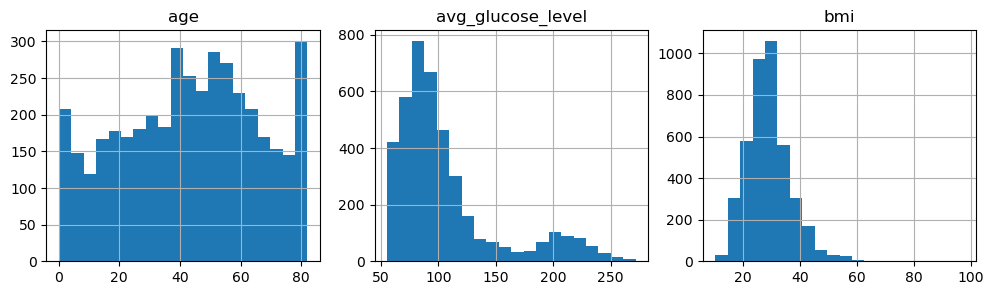

In [16]:
plt.figure(figsize=(12, 3))
for i in range(0, len(numerical)):
    plt.subplot(1, 3, i+1)
    plt.title(numerical[i])
    df_train_full[numerical[i]].hist(bins=20)

### Target feature

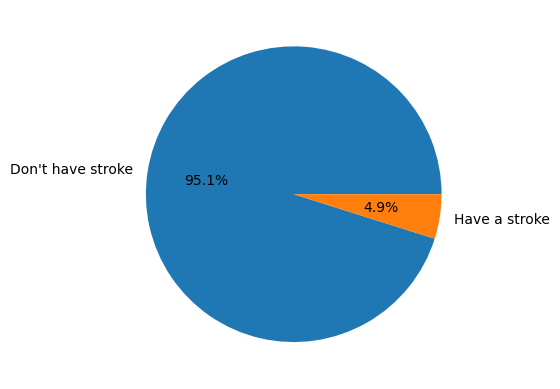

In [17]:
plt.pie(df_train_full.stroke.value_counts(), autopct='%1.1f%%', labels = ["Don't have stroke", "Have a stroke"]);

### Feature importance

#### Mutual information

In [18]:
from sklearn.metrics import mutual_info_score
def mutual_info(series):
    return mutual_info_score(series, df_train_full.stroke)

In [19]:
mi = df_train_full[categorical].apply(mutual_info)
mi.sort_values(ascending=False)

work_type         0.007504
ever_married      0.007349
hypertension      0.006612
heart_disease     0.005339
smoking_status    0.002526
residence_type    0.000364
gender            0.000035
dtype: float64

#### Correlation

<Axes: >

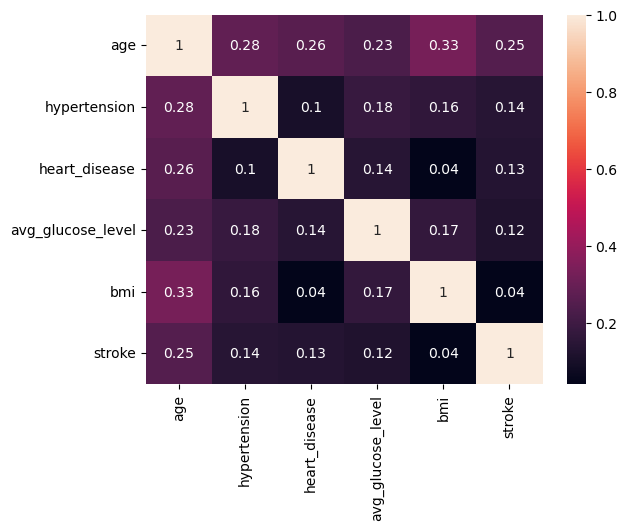

In [20]:
corr_matrix = df_train_full.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True)

## Data preparation

In [21]:
y_train= df_train['stroke']
y_test =df_test['stroke']
y_val =df_val['stroke']

X_train = df_train.drop('stroke', axis=1)
X_test = df_test.drop('stroke', axis=1)
X_val = df_val.drop('stroke', axis=1)

### One-hot encoding

In [22]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')

val_dict = X_val.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

X_val = dv.transform(val_dict)

## Models training

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
val_results = pd.DataFrame(columns=['model', 'params', 'roc_auc', 'recall'])
model_results = pd.DataFrame(columns=['params', 'roc_auc', 'recall'])

Here I used two metrics to evaluate models performance: roc_auc and recall. It's because the dataset is highly imbalanced(only 5% of the instances belong to the positive class). Recall shows what proportion of actual positives was identified correctly. So, by controlling recall value we don't get a situation where the model predicts all instances as negatives, but accuracy is still high because most of the instances are negative.

### Logistic Regerssion

In [24]:
from sklearn.linear_model import LogisticRegression
for solv, pen in [('lbfgs', 'l2'), ('liblinear', 'l1')]:
    for c in [0.001, 0.01, 0.1, 1]:
        lr = LogisticRegression(random_state=4, class_weight='balanced', C=c, solver=solv, penalty=pen, max_iter=1000)
        lr.fit(X_train, y_train)
        y_pred = lr.predict_proba(X_val)[:, 1]
        roc_auc=roc_auc_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred.round())
        model_results.loc[len(model_results)] = ['C=' +str(c)+ ' solver=' + str(solv)+' penalty='
                                                 +str(pen), roc_auc, recall]

In [25]:
model_results.sort_values(by=['recall', 'roc_auc'], ascending=False)

,params,roc_auc,recall
5,C=0.01 solver=liblinear penalty=l1,0.820239,0.867925
4,C=0.001 solver=liblinear penalty=l1,0.819158,0.867925
0,C=0.001 solver=lbfgs penalty=l2,0.860370,0.849057
6,C=0.1 solver=liblinear penalty=l1,0.858559,0.849057
1,C=0.01 solver=lbfgs penalty=l2,0.859123,0.830189
2,C=0.1 solver=lbfgs penalty=l2,0.854333,0.792453
7,C=1 solver=liblinear penalty=l1,0.852230,0.792453
3,C=1 solver=lbfgs penalty=l2,0.852094,0.792453


In [26]:
val_results.loc[len(val_results)] = ['LogisticRegression']+model_results.iloc[5].to_list()

### Decision tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_results.drop(model_results.index , inplace=True)

for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=4)
    dt.fit(X_train, y_train)
    #y_pred = dt.predict(X_val)
    y_pred = dt.predict_proba(X_val)[:, 1]
    roc_auc=roc_auc_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred.round())
    model_results.loc[len(model_results)] = ['max_depth=' +str(depth), roc_auc, recall]
    

In [28]:
model_results.sort_values(by=['recall', 'roc_auc'], ascending=False)

,params,roc_auc,recall
1,max_depth=3,0.843838,0.886792
0,max_depth=2,0.832477,0.886792
2,max_depth=4,0.764258,0.811321
3,max_depth=5,0.742547,0.716981
4,max_depth=6,0.712960,0.641509
5,max_depth=7,0.692233,0.566038
6,max_depth=8,0.691386,0.547170
7,max_depth=9,0.682517,0.509434
8,max_depth=10,0.653796,0.452830
9,max_depth=15,0.569903,0.188679


In [29]:
val_results.loc[len(val_results)] = ['DecisionTreeClassifier']+model_results.iloc[1].to_list()

### Random forest classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model_results.drop(model_results.index , inplace=True)
for depth in [2, 4, 6, 8, 10]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=depth, random_state=4, class_weight='balanced')
        rf.fit(X_train, y_train)
        #y_pred = rf.predict(X_val)
        y_pred = rf.predict_proba(X_val)[:, 1]
        roc_auc=roc_auc_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred.round())
        model_results.loc[len(model_results)] = ['max_depth='+ str(depth) +' n_estimators=' +str(n), roc_auc, recall]
    

In [31]:
model_results.sort_values(by=['recall', 'roc_auc'], ascending=False)

,params,roc_auc,recall
3,max_depth=2 n_estimators=40,0.834648,0.943396
2,max_depth=2 n_estimators=30,0.832009,0.943396
18,max_depth=2 n_estimators=190,0.833664,0.924528
1,max_depth=2 n_estimators=20,0.828981,0.924528
6,max_depth=2 n_estimators=70,0.834580,0.905660
...,...,...,...
88,max_depth=10 n_estimators=90,0.794147,0.075472
89,max_depth=10 n_estimators=100,0.793271,0.075472
90,max_depth=10 n_estimators=110,0.793037,0.075472
87,max_depth=10 n_estimators=80,0.792433,0.075472


In [32]:
val_results.loc[len(val_results)] = ['RandomForestClassifier']+model_results.iloc[3].to_list()

### Gradient boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model_results.drop(model_results.index , inplace=True)
for depth in [1, 2, 3, 4, 5]:
    for n in[10, 50, 100, 200]:
        for l in [0.001, 0.01, 0.1, 1]:
            gb = GradientBoostingClassifier(learning_rate=l, n_estimators=n, max_depth=depth, random_state=4)
            gb.fit(X_train, y_train)
            y_pred = gb.predict_proba(X_val)[:, 1]
            roc_auc=roc_auc_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred.round())
            model_results.loc[len(model_results)] = ['max_depth='+ str(depth) +' n_estimators=' +str(n) +
                                                     ' learning_rate'+str(l), roc_auc, recall]


In [35]:
model_results.sort_values(by=['recall', 'roc_auc'], ascending=False)

,params,roc_auc,recall
71,max_depth=5 n_estimators=50 learning_rate1,0.701141,0.245283
75,max_depth=5 n_estimators=100 learning_rate1,0.684064,0.245283
79,max_depth=5 n_estimators=200 learning_rate1,0.640701,0.245283
67,max_depth=5 n_estimators=10 learning_rate1,0.714956,0.188679
43,max_depth=3 n_estimators=100 learning_rate1,0.736774,0.150943
...,...,...,...
68,max_depth=5 n_estimators=50 learning_rate0.001,0.818438,0.000000
72,max_depth=5 n_estimators=100 learning_rate0.001,0.818311,0.000000
64,max_depth=5 n_estimators=10 learning_rate0.001,0.798275,0.000000
0,max_depth=1 n_estimators=10 learning_rate0.001,0.755077,0.000000


In [36]:
val_results.loc[len(val_results)] = ['GradientBoostingClassifier']+model_results.iloc[71].to_list()

In [37]:
val_results

,model,params,roc_auc,recall
0,LogisticRegression,C=0.01 solver=liblinear penalty=l1,0.820239,0.867925
1,DecisionTreeClassifier,max_depth=3,0.843838,0.886792
2,RandomForestClassifier,max_depth=2 n_estimators=40,0.834648,0.943396
3,GradientBoostingClassifier,max_depth=5 n_estimators=50 learning_rate1,0.701141,0.245283


## Final model training

In [38]:
y_train= df_train_full['stroke']
X_train = df_train_full.drop('stroke', axis=1)

dv = DictVectorizer(sparse=True)

train_dict = X_train.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_test = dv.transform(test_dict)


In [39]:
model = RandomForestClassifier(random_state=4, max_depth=2, n_estimators=40, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=40,
                       random_state=4)

In [40]:
y_pred = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", round(roc_auc_score(y_test, y_pred), 2))
print("Recall:", recall_score(y_test, y_pred.round()))

ROC AUC: 0.81
Recall: 0.84
